# Zach McLean
## Open Lab 5
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

# CIFAR10 Results Comparison

This notebook compares the validation loss and validation accuracy learning curves of three models trained on CIFAR10:

- **Residual Network** (`cifar10-residual.py`)
- **Bottleneck Conv2d Network** (`cifar10-conv2d-bottleneck.py`)
- **Residual Conv2d Network** (`cifar10-conv2d-residual.py`)

The corresponding metrics CSV files are:

- `cifar10-metrics-residual.csv`
- `cifar10-metrics-conv2d-bottleneck.csv`
- `cifar10-metrics-conv2d-residual.csv`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics CSV files
residual_df = pd.read_csv('cifar10-metrics-residual.csv')
bottleneck_df = pd.read_csv('cifar10-metrics-conv2d-bottleneck.csv')
conv2d_residual_df = pd.read_csv('cifar10-metrics-conv2d-residual.csv')

print('Residual Network Metrics:')
print(residual_df.head())

print('Bottleneck Conv2d Network Metrics:')
print(bottleneck_df.head())

print('Residual Conv2d Network Metrics:')
print(conv2d_residual_df.head())


Residual Network Metrics:
   epoch  train_loss  train_acc  val_loss  val_acc
0     32    0.105149   0.962825  1.169265   0.7348
1      1    1.465688   0.465225  1.183690   0.5759
2     33    0.103078   0.964175  1.122849   0.7413
3      2    1.053619   0.623125  1.073493   0.6116
4     34    0.107516   0.962100  1.123880   0.7422
Bottleneck Conv2d Network Metrics:
   epoch  train_loss  train_acc  val_loss  val_acc
0      1    1.314895   0.519200  1.688527   0.4608
1      2    0.930055   0.665650  0.999580   0.6480
2      3    0.782677   0.718575  1.089877   0.6284
3      4    0.678632   0.760275  1.062303   0.6611
4      5    0.589967   0.793325  0.903145   0.6918
Residual Conv2d Network Metrics:
   epoch  train_loss  train_acc  val_loss  val_acc
0      1    1.388161   0.503925  1.244080   0.5605
1      2    0.924974   0.673400  0.909736   0.6830
2      3    0.767709   0.729800  0.919540   0.6706
3      4    0.662153   0.767150  0.803100   0.7238
4      5    0.590901   0.792200  0.8479

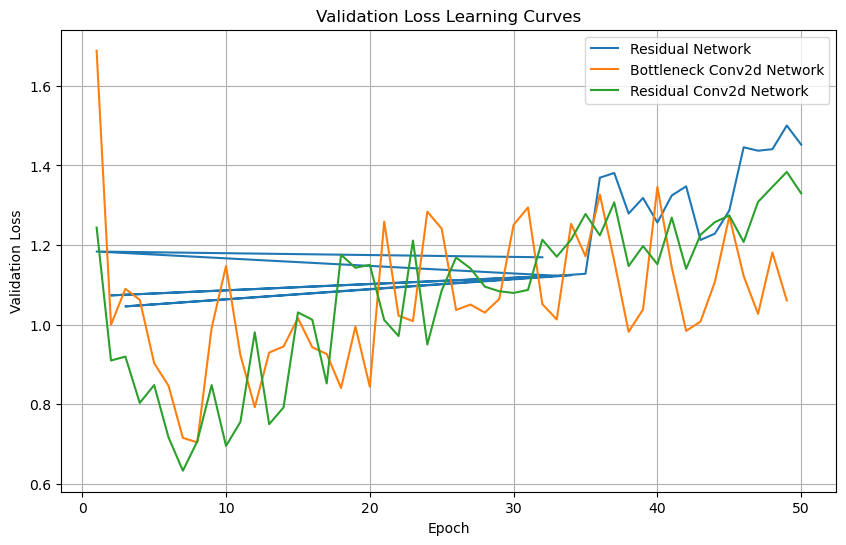

In [2]:
# Plot Validation Loss Learning Curves
plt.figure(figsize=(10,6))
plt.plot(residual_df['epoch'], residual_df['val_loss'], label='Residual Network')
plt.plot(bottleneck_df['epoch'], bottleneck_df['val_loss'], label='Bottleneck Conv2d Network')
plt.plot(conv2d_residual_df['epoch'], conv2d_residual_df['val_loss'], label='Residual Conv2d Network')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


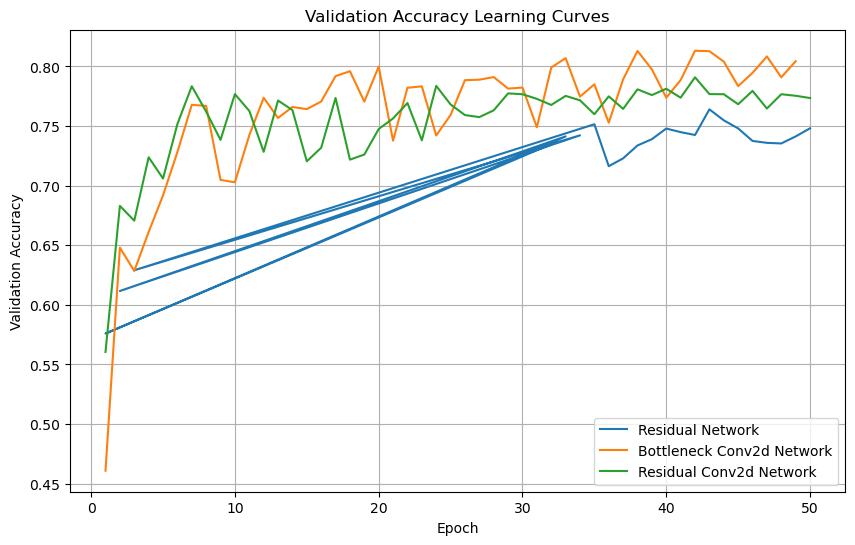

In [3]:
# Plot Validation Accuracy Learning Curves
plt.figure(figsize=(10,6))
plt.plot(residual_df['epoch'], residual_df['val_acc'], label='Residual Network')
plt.plot(bottleneck_df['epoch'], bottleneck_df['val_acc'], label='Bottleneck Conv2d Network')
plt.plot(conv2d_residual_df['epoch'], conv2d_residual_df['val_acc'], label='Residual Conv2d Network')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


## Comparison and Discussion

The learning curves illustrate several qualitative differences among the three models:

- **Residual Network:**  
  The curves show a steady decrease in loss and a gradual increase in accuracy. The residual connections help overcome the vanishing gradient problem, allowing deeper learning.

- **Bottleneck Conv2d Network:**  
  By using bottleneck operations (1x1 convolutions to reduce then restore dimensions), this network tends to have a lower parameter count while still learning complex features. This may result in faster convergence or a more compact model that generalizes well.

- **Residual Conv2d Network:**  
  With a stack of five Conv2D blocks (each with its own residual connection) interleaved with pooling, this network preserves spatial information and builds hierarchical features. Its convergence pattern might differ due to the combination of pooling and residual paths.

Overall, the differences in convergence rate, stability, and final accuracy reflect the trade-offs in architectural design. The bottleneck structure might achieve efficiency with fewer parameters, while the plain residual Conv2D network may benefit from its simplicity and strong spatial encoding. These insights help in understanding how inductive biases in each architecture affect learning on the CIFAR10 task.
